In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ggplot import *
plt.style.use('ggplot')

In [3]:
happy = pd.read_csv('happiness.csv')
happy.head(10)

,country,code,happiness,health,life
0,Japan,JPN,5.921,4.706717e+11,83.59
1,Spain,ESP,6.361,1.236415e+11,83.08
2,Switzerland,CHE,7.509,7.865363e+10,82.85
3,Italy,ITA,5.977,1.980128e+11,82.69
4,Singapore,SGP,6.739,1.515589e+10,82.65
5,France,FRA,6.478,3.264751e+11,82.37
6,Australia,AUS,7.313,1.400353e+11,82.25
7,Luxembourg,LUX,6.871,4.467499e+09,82.21
8,Israel,ISR,7.267,2.375480e+10,82.15
9,Iceland,ISL,7.501,1.509256e+09,82.06


In [7]:
#happy.shape
happy.describe()

,happiness,health,life
count,157.000000,1.350000e+02,138.000000
mean,5.382185,5.374209e+10,71.769928
std,1.141674,2.682757e+11,8.283723
min,2.905000,4.370584e+07,50.880000
25%,4.404000,1.020471e+09,65.665000
50%,5.314000,3.708896e+09,74.095000
75%,6.269000,1.980680e+10,77.772500
max,7.526000,2.985748e+12,83.590000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117cd41d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11805f990>]], dtype=object)

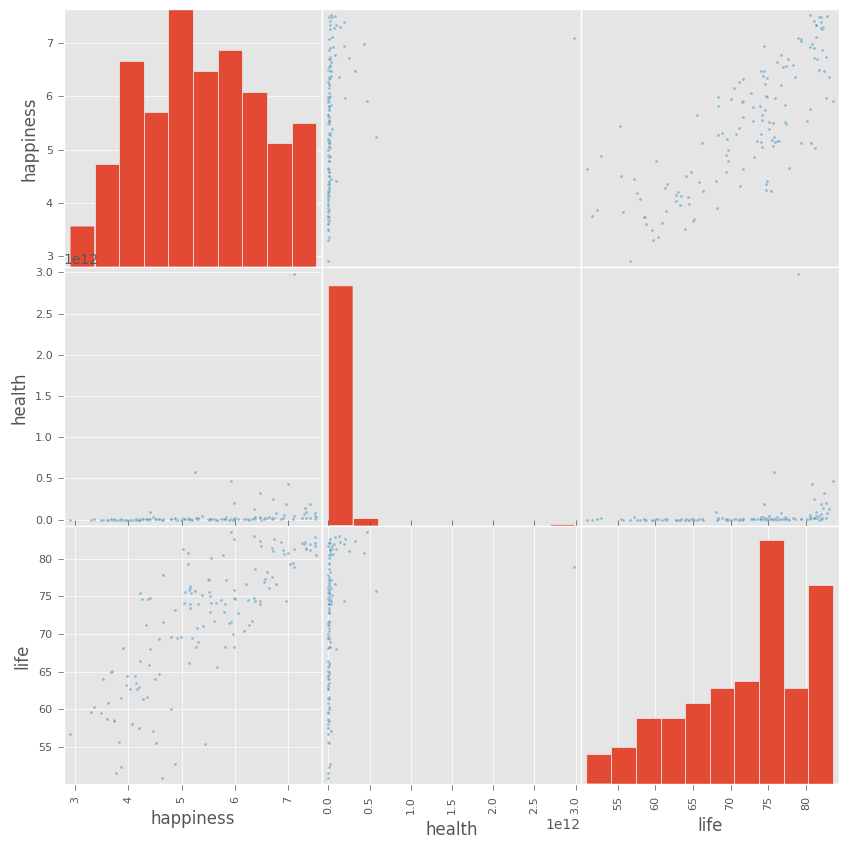

In [5]:
pd.scatter_matrix(happy, figsize=(10,10))

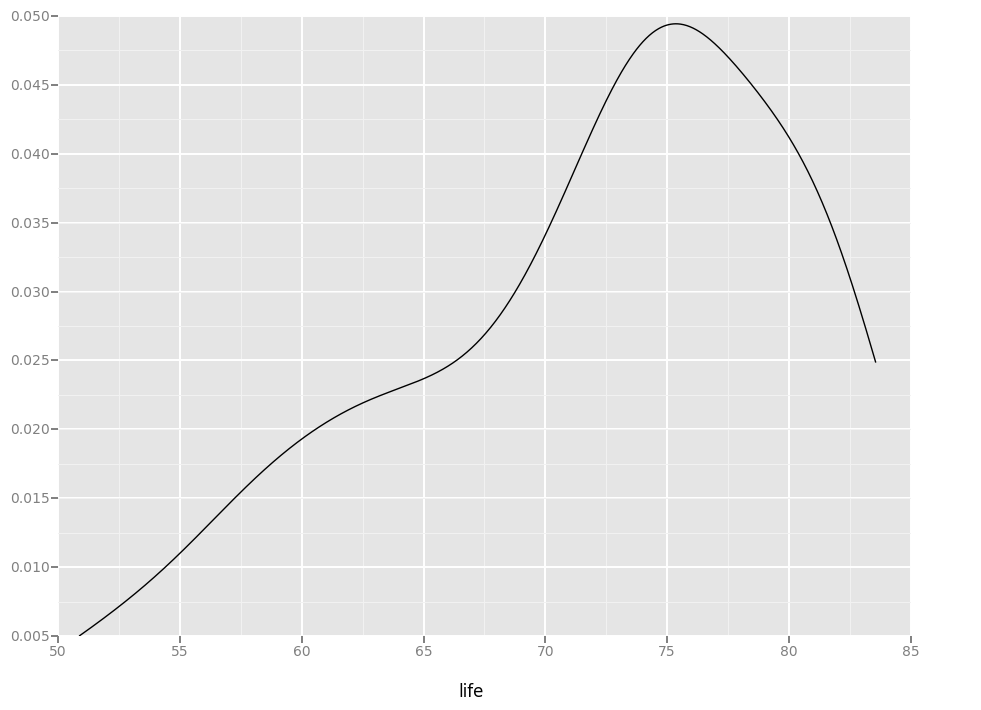

<ggplot: (294561409)>

In [6]:
ggplot(happy, aes(x='life')) + geom_density()
#ggplot(happy, aes(x='happiness')) + geom_density()
#ggplot(happy, aes(x='health')) + geom_density()